<a href="https://colab.research.google.com/github/ianxdxd/CalculusForML/blob/main/GradientBasedOptimazation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

#### Gradient Descent

In [46]:
class SquareRootScheduler:
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * pow(num_update + 1.0, -0.5)

def normGrad(v, max_norm=1):
    norm = np.linalg.norm(v)
    if norm > max_norm:
        v = v * max_norm / norm # Scale the vector
    return v

def GradientDescent(x_start, y_start, n_iterations, momentum=0.85, learning_rate=0.3, tol_threshold=1e-6, clip_threshold=10):

    '''
    learning rate: control the step size during updates
    '''
    x_path, y_path = [x_start], [y_start]
    x,y = x_start, y_start
    X_change = 0.0
    Y_change = 0.0

    for i in range(n_iterations):
        x_grad = Fx(x,y)
        y_grad = Fy(x,y)

        grad = normGrad(np.array([x_grad, y_grad]), max_norm=10)
        x_grad, y_grad = grad[0], grad[1]

        scheduler = SquareRootScheduler(lr=learning_rate)
        learning_rate = scheduler(i)

        X_change = learning_rate * x_grad + momentum * X_change
        Y_change = learning_rate * y_grad + momentum * Y_change

        x = x - X_change
        y = y - Y_change

        x = np.clip(x, -10, 10)
        y = np.clip(y, -10, 10)

        # Check for convergence
        # This can help detect if the values are diverging.
        if i > 0 and np.linalg.norm([x, y] - np.array([x_path[-1], y_path[-1]])) < tol_threshold:
            break

        x_path.append(x) # append to path
        y_path.append(y)


    return x_path, y_path

def f(x,y):
    # return x**2 + y**2
    return x**2*y
    # return (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    # return 0.26*(x**2 + y**2) - 0.48*x*y

def Fx(x,y):
    # return 2*x
    return 2*x*y
    # return 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    # return 0.52*x - 0.48*y

def Fy(x,y):
    # return 2*y
    return x**2
    # return 2*y*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    # return 0.52*y - 0.48*x

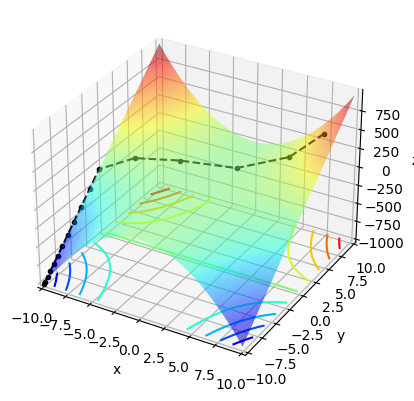

In [47]:
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
X,Y = np.meshgrid(x,y) # array of values containing all value pairs (xi, yi)
Z = f(X,Y)

# s_x,s_y = np.random.uniform(-10, 10, size=(1,)), np.random.uniform(-10, 10, size=(1,))
s_x,s_y = 8,8
n_iter = 100
x_path, y_path = GradientDescent(s_x, s_y, n_iter)

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.plot_surface(X, Y, Z,
                cmap="jet", rstride=1, cstride=1, alpha=0.6)
ax.contour(X, Y, Z, 10,
           offset=np.min(Z), cmap="jet") # offset=min(Z) set the countor on the xy plane
z_path = f(np.array(x_path), np.array(y_path))
ax.plot(x_path, y_path, z_path, 'k.--')

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([np.min(Z), np.max(Z)])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
